David Duffrin

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
salaries = pd.read_csv('Data/VizData.csv', dtype={'Position Number': str, ' Class Code': str, ' Class Title': str}).fillna(0)

[All Florida Public Salary Data is taken from this link.](https://prod.flbog.net:4445/pls/apex/f?p=140:1:0:::::)

* Please Note: I simplified the Job Types by grouping them into one of four categories: Administration, Faculty, Both, or Other.

I am making visualizations to compare the salaries of the different job types and schools of the Florida Public Universities. I am doing this because I am interested in trying to find differences in pay between these two categories to see how public funds are allocated and to see if there is an underlying bias that is deciding salaries.

This is important data to look at because these salaries are paid with public funds, so we have a say in how these are allocated.

In [2]:
salaries[' Job Type'] = 'Other'
salaries.loc[salaries[' Class Title'].str.contains('PROVOST|DEAN|ADMIN|PRES|VP|LIBRARIAN|OFFICER', na=False), ' Job Type'] = 'Administration'
salaries.loc[salaries[' Class Title'].str.contains('LECTURER|RESEARCH|PROFESSOR|INSTRUCTOR|TEACHING|FACULTY', na=False), ' Job Type'] = 'Faculty'
salaries.loc[salaries[' Class Title'].str.contains('PROVOST|DEAN|ADMIN|PRES|VP|LIBRARIAN|OFFICER', na=False) & salaries[' Class Title'].str.contains('LECTURER|RESEARCH|PROFESSOR|INSTRUCTOR|TEACHING|FACULTY', na=False), ' Job Type'] = 'Both'

In [3]:
summed_salaries = salaries.groupby(['University',' First Name',' Last Name', ' MI', ' Job Type'], as_index=False).sum()
summed_salaries[' Total Salary'] = summed_salaries[' OPS Term Amount'] + summed_salaries[' Annual Salary']

In [4]:
del summed_salaries[' Annual Salary']
del summed_salaries[' OPS Term Amount']
del summed_salaries[' First Name']
del summed_salaries[' Last Name']
del summed_salaries[' MI']

[]

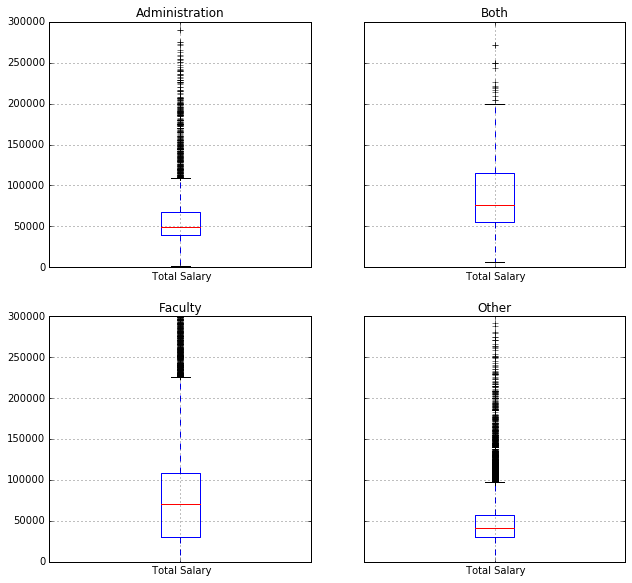

In [5]:
job_salaries = summed_salaries.groupby([' Job Type'])
job_salaries.boxplot(column=[' Total Salary'], return_type='axes', figsize=(10,10), meanline=True)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/100)
plt.plot()

[]

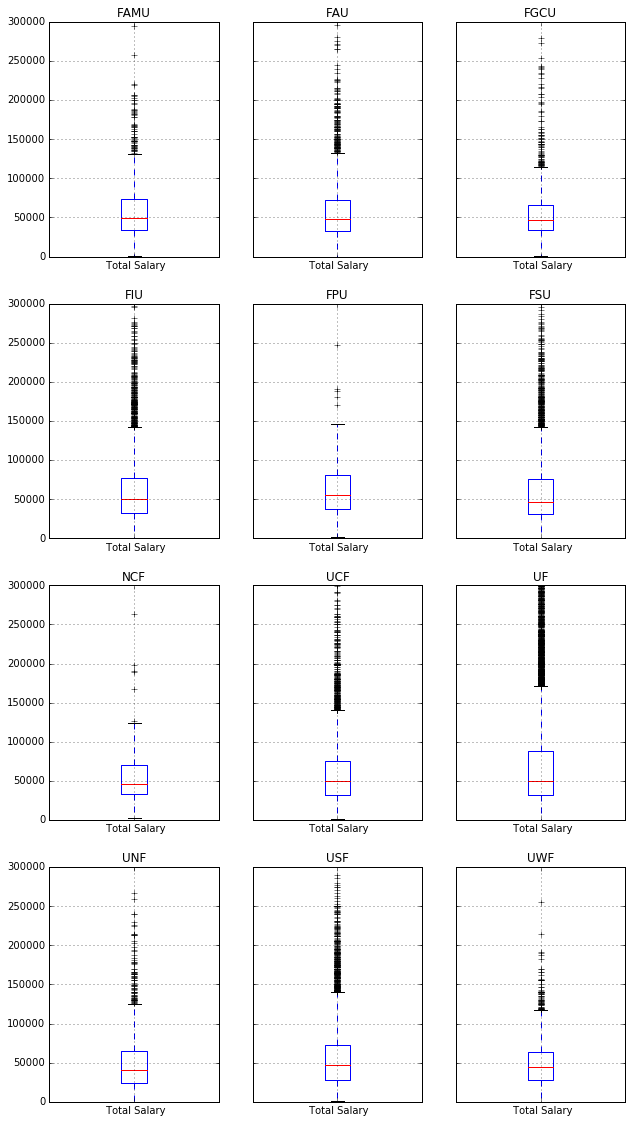

In [6]:
university_salaries = summed_salaries.groupby(['University'])
university_salaries.boxplot(column=[' Total Salary'], return_type='axes', figsize=(10,20), meanline=True)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/100)
plt.plot()

In [7]:
print('Comparing the Standard Deviation of Full-time Equivalent and Salary by Job Type \n')
print(job_salaries.std())

Comparing the Standard Deviation of Full-time Equivalent and Salary by Job Type 

                     FTE   Total Salary
 Job Type                              
Administration  0.061771   43634.112494
Both            0.103739   50910.537153
Faculty         4.933460  165840.426192
Other           0.281754  177763.348844


In [8]:
print('Comparing the Average Full-time Equivalent and Salary by Job Type \n')
print(summed_salaries.groupby([' Job Type']).mean())

Comparing the Average Full-time Equivalent and Salary by Job Type 

                     FTE   Total Salary
 Job Type                              
Administration  0.993253   63165.586679
Both            0.977770   91804.345070
Faculty         0.684856   84808.116220
Other           0.910090   48962.571820


In [9]:
print('Comparing the Average Full-time Equivalent and Salary by University \n')
print(summed_salaries.groupby(['University']).mean())

Comparing the Average Full-time Equivalent and Salary by University 

                 FTE   Total Salary
University                         
FAMU        0.853252   57329.706950
FAU         0.774452   58457.344217
FGCU        0.752594   52138.731156
FIU         0.811142   61426.864967
FPU         0.869318   62902.681818
FSU         0.872430   62268.075608
NCF         0.877324   52965.471572
UCF         0.984478   60562.000348
UF          0.834155   76013.401930
UNF         0.794275   47485.549726
USF         0.767675   57808.785985
UWF         0.803653   48740.630155


Please Note:

* With a lack of columns that specify factors such as how long the person has been working, we are missing some factors that explain the differences in salary between staff.

* The tables contain the averages with the outliers not removed. This makes the data skewed toward the outliers, which is very apparent when compared to the medians in the boxplots.

In the Administration category, the majority of staff make slightly below the average for all salaries, however there are a lot of outliers near the top (most likely President, Dean, etc) who make significantly more than everyone else. The Faculty category has a high standard deviation, most likely due to the fact that Graduate students were included in the report, which created some Faculty data with low income. Overall, the numbers were about what I expected, with the rankings of Job Types from highest to lowest salary being: Both, Administration, Faculty, and then Other. When comparing the Universities, New College appears to be near the bottom, with only 3 other Universities' average salaries being lower. This may be because the average Full-time Equivalent of New College is also below average, with some professors having other work over the summer that is not accounted for in this data, while those at other Universities might have more Faculty working year-long.